## Mô tả dự án

**Trong dự án này em sẽ xây dựng mô hình dự đoán khách sạn mà người dùng sẽ đặt phòng. Em sử dụng bộ dữ liệu Expedia Hotel Recommendations trên kaggle. Input bài toán là các thuộc tính của bộ dữ liệu, output sẽ là ID của khách sạn mà người dùng sẽ đặt phòng.**

##Import các thư viện

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Đọc Datasets

Do data khá lớn nên em chỉ chọn ra 20000 dòng để train

In [4]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project 3 day/train.csv',nrows=20000)
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project 3 day/test.csv',nrows=10000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [6]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [7]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  20000 non-null  object 
 1   site_name                  20000 non-null  int64  
 2   posa_continent             20000 non-null  int64  
 3   user_location_country      20000 non-null  int64  
 4   user_location_region       20000 non-null  int64  
 5   user_location_city         20000 non-null  int64  
 6   orig_destination_distance  11868 non-null  float64
 7   user_id                    20000 non-null  int64  
 8   is_mobile                  20000 non-null  int64  
 9   is_package                 20000 non-null  int64  
 10  channel                    20000 non-null  int64  
 11  srch_ci                    19988 non-null  object 
 12  srch_co                    19988 non-null  object 
 13  srch_adults_cnt            20000 non-null  int

In [9]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project 3 day/train.csv', parse_dates=['date_time'] ,sep=',',nrows=20000)

In [10]:
train.shape

(20000, 24)

In [11]:
train.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [12]:
train.dtypes

date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                              object
srch_co                              object
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
is_booking                            int64
cnt                                   int64
hotel_continent                       int64
hotel_country                         int64
hotel_market                    

## Missing Values

In [13]:
#Xem mỗi thuộc tính có bao nhiêu giá trị null
train.isnull().sum()


date_time                       0
site_name                       0
posa_continent                  0
user_location_country           0
user_location_region            0
user_location_city              0
orig_destination_distance    8132
user_id                         0
is_mobile                       0
is_package                      0
channel                         0
srch_ci                        12
srch_co                        12
srch_adults_cnt                 0
srch_children_cnt               0
srch_rm_cnt                     0
srch_destination_id             0
srch_destination_type_id        0
is_booking                      0
cnt                             0
hotel_continent                 0
hotel_country                   0
hotel_market                    0
hotel_cluster                   0
dtype: int64

In [14]:
#Tính tỉ lệ phần trăm các giá trị null của các thuộc tính
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
orig_destination_distance,8132,0.4066
srch_co,12,0.0006
srch_ci,12,0.0006
srch_adults_cnt,0,0.0000
hotel_market,0,0.0000
hotel_country,0,0.0000
hotel_continent,0,0.0000
cnt,0,0.0000
is_booking,0,0.0000
srch_destination_type_id,0,0.0000


In [15]:
#Tính tỉ lệ phần trăm các giá trị null của tập test
total=test.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
orig_destination_distance,4107.0,0.4066
id,0.0,NaN
srch_ci,0.0,0.0006
hotel_country,0.0,0.0000
hotel_continent,0.0,0.0000
srch_destination_type_id,0.0,0.0000
srch_destination_id,0.0,0.0000
srch_rm_cnt,0.0,0.0000
srch_children_cnt,0.0,0.0000
srch_adults_cnt,0.0,0.0000


In [16]:
#Thay các giá trị null bằng giá trị mean
train['orig_destination_distance'].fillna(train['orig_destination_distance'].mean(), inplace=True)
test['orig_destination_distance'].fillna(test['orig_destination_distance'].mean(), inplace=True)

In [17]:
train.isnull().sum()

date_time                     0
site_name                     0
posa_continent                0
user_location_country         0
user_location_region          0
user_location_city            0
orig_destination_distance     0
user_id                       0
is_mobile                     0
is_package                    0
channel                       0
srch_ci                      12
srch_co                      12
srch_adults_cnt               0
srch_children_cnt             0
srch_rm_cnt                   0
srch_destination_id           0
srch_destination_type_id      0
is_booking                    0
cnt                           0
hotel_continent               0
hotel_country                 0
hotel_market                  0
hotel_cluster                 0
dtype: int64

In [20]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [18]:
train.shape

(20000, 24)

In [19]:
test.shape

(10000, 22)

## Trực quan hóa dữ liệu

### 1. Độ tương quan giữa các thuộc tính

**Dùng heat map có thể xem mối tương quan giữa các thuộc tính**

<ipython-input-20-8740ad59de58>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)


<Axes: >

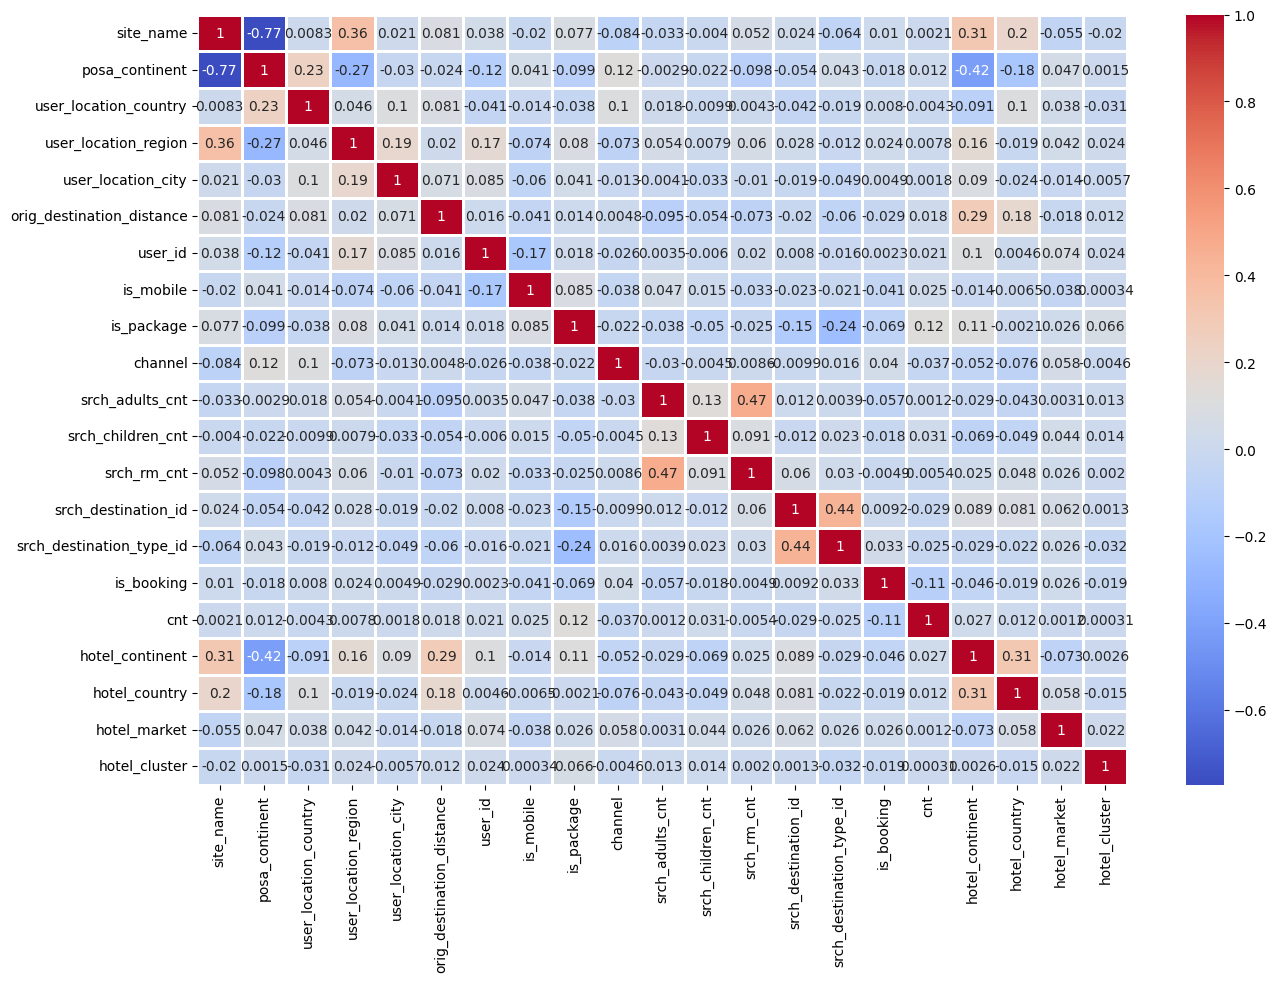

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

**=> Các thuộc tính trong dataset không có độ tương quan cao**

### 2. Số lượt đặt phòng qua điện thoại di động

<Axes: xlabel='is_mobile', ylabel='count'>

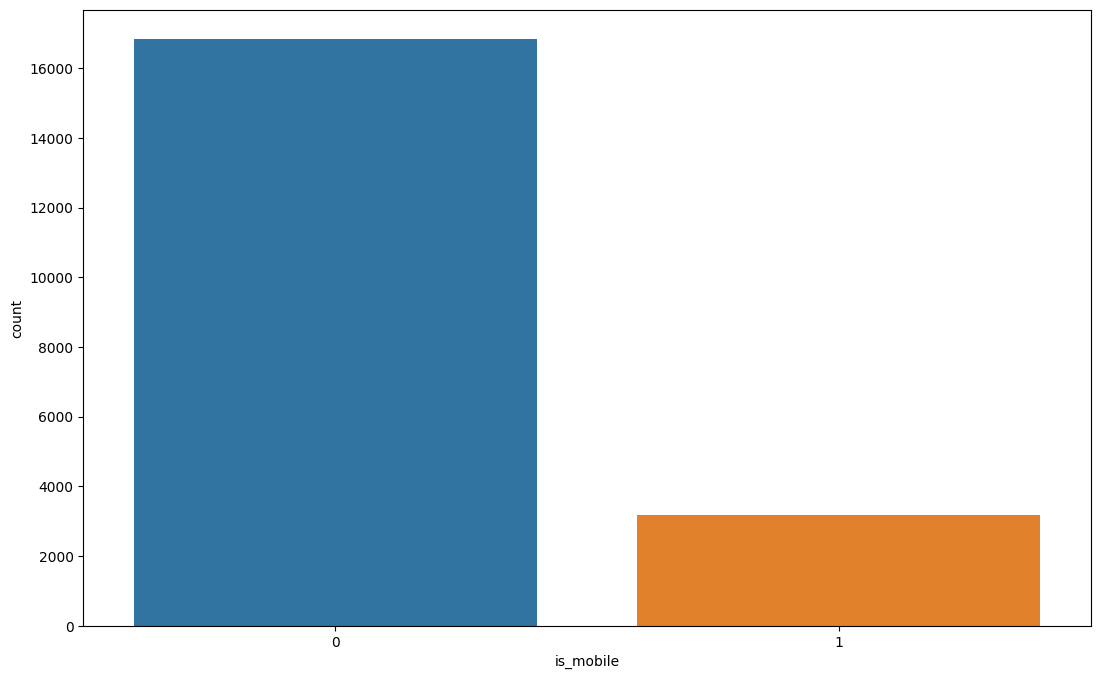

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_mobile',data=train, order=[0,1],ax=ax)

**=> Khách hàng thường có xu hướng đặt phòng trên web thay vì đặt hàng trên di nên Expedia có thể xây dựng trang web thân thiện với người dùng để phục vụ nhu cầu đặt phòng của họ**

### 3. Số lượt đặt phòng trọn gói

<Axes: xlabel='is_package', ylabel='count'>

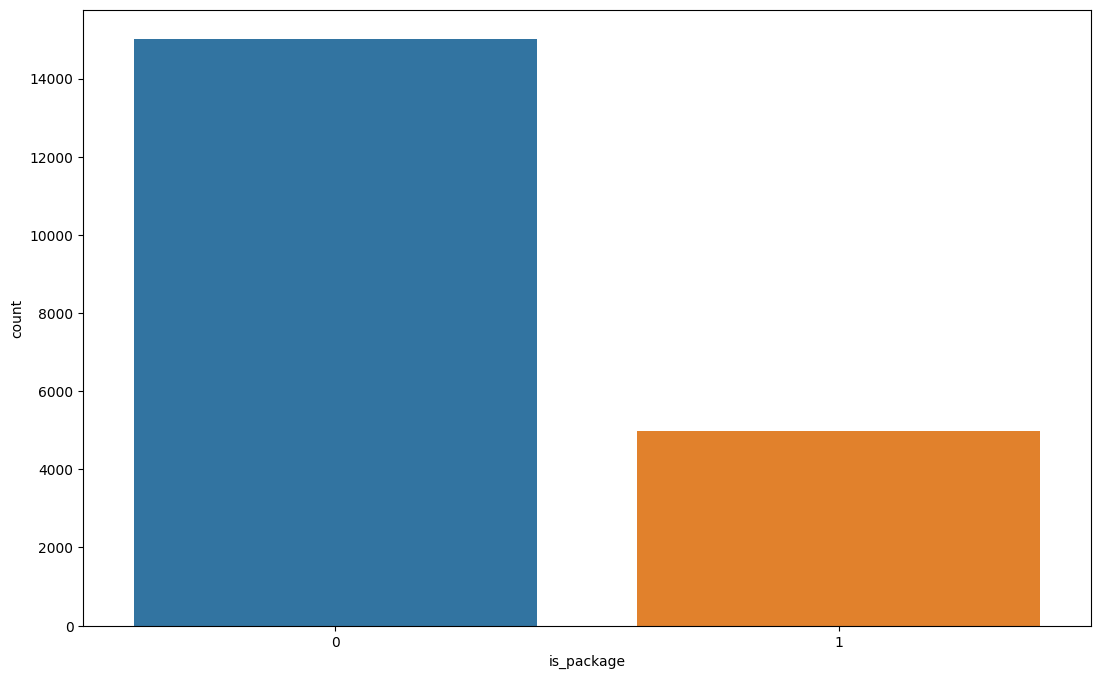

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_package',data=train, order=[0,1], ax=ax)

**=> Khách hàng đặt du lịch trọn gói khá ít điều này có thể một phần do chi phí khá đắt**

### 4. Số lượt đặt phòng của trang web tại các lục địa

<Axes: xlabel='posa_continent', ylabel='count'>

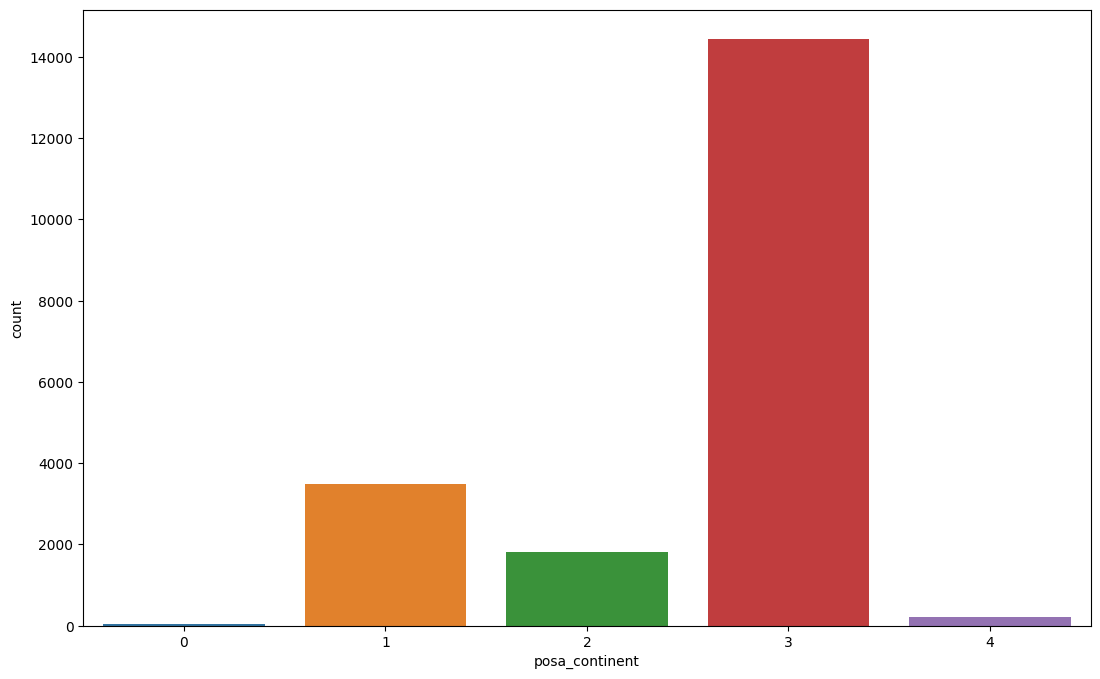

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='posa_continent', data=train,order=[0,1,2,3,4],ax=ax)

**=> Hầu hết những người đặt phòng là từ lục địa 3. Có lẽ những người ở đó có nhiều khả năng chi tiêu hơn. Nên Expedia có thể tăng cường hoạt động kinh doanh của mình bằng cách tăng nhiều lựa chọn khách sạn hơn, đa dạng hơn, trải nghiệm người dùng tốt hơn, v.v. Đối với các châu lục khác, Expedia có thể giảm giá khách sạn hoặc giảm giá, tích điểm cho khách hàng thân thiết.**

### 5. Số lượng khách sạn của các châu lục

<Axes: xlabel='hotel_continent', ylabel='count'>

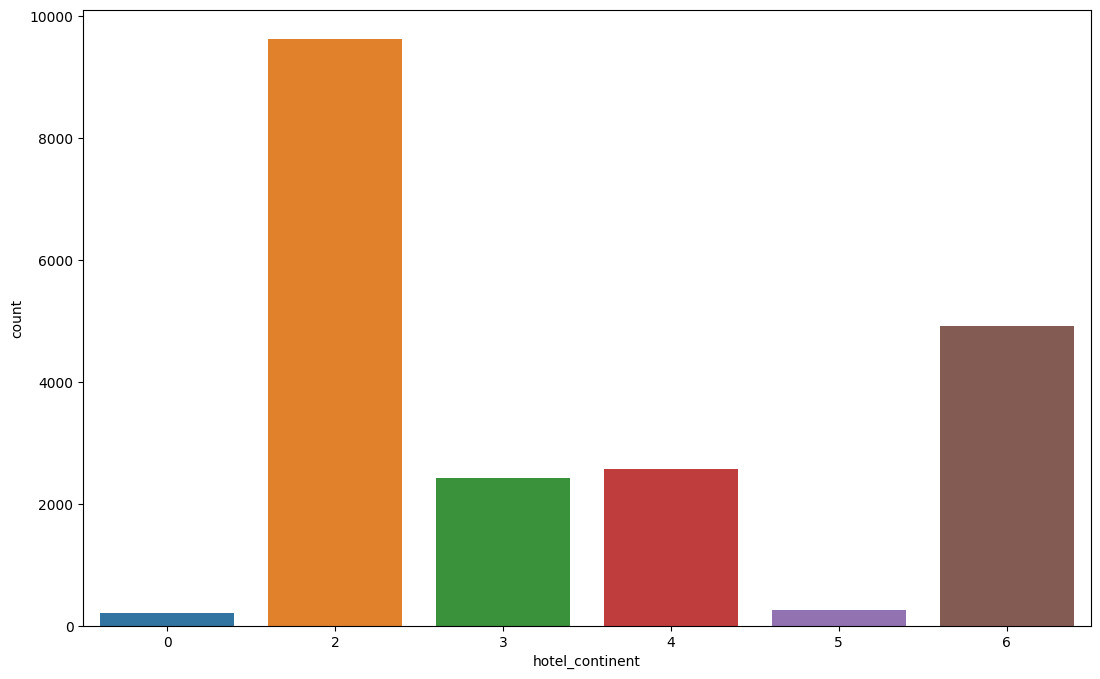

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='hotel_continent', data=train,order=[0,2,3,4,5,6],ax=ax)

**=> Châu lục thứ 2 có nhiều khách sạn nhất trong khi đó châu lục 0 có rất ít khách sạn**

### 6. Kết hợp biểu đồ 4 và 5

<Axes: xlabel='hotel_continent', ylabel='count'>

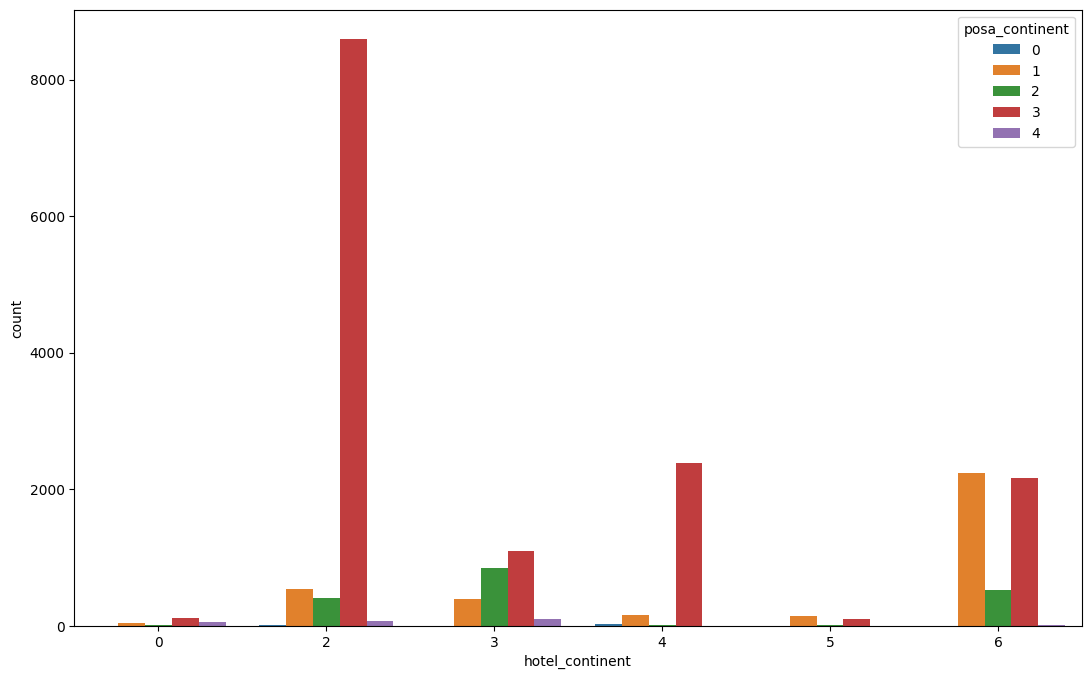

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

In [26]:
#Dữ liệu tại nơi khách hàng có đặt phòng
bookings=train[train["is_booking"] == 1]

### 7. Những quốc gia có số lượng khách hàng đi du lịch nhiều nhất

<Axes: xlabel='user_location_country', ylabel='count'>

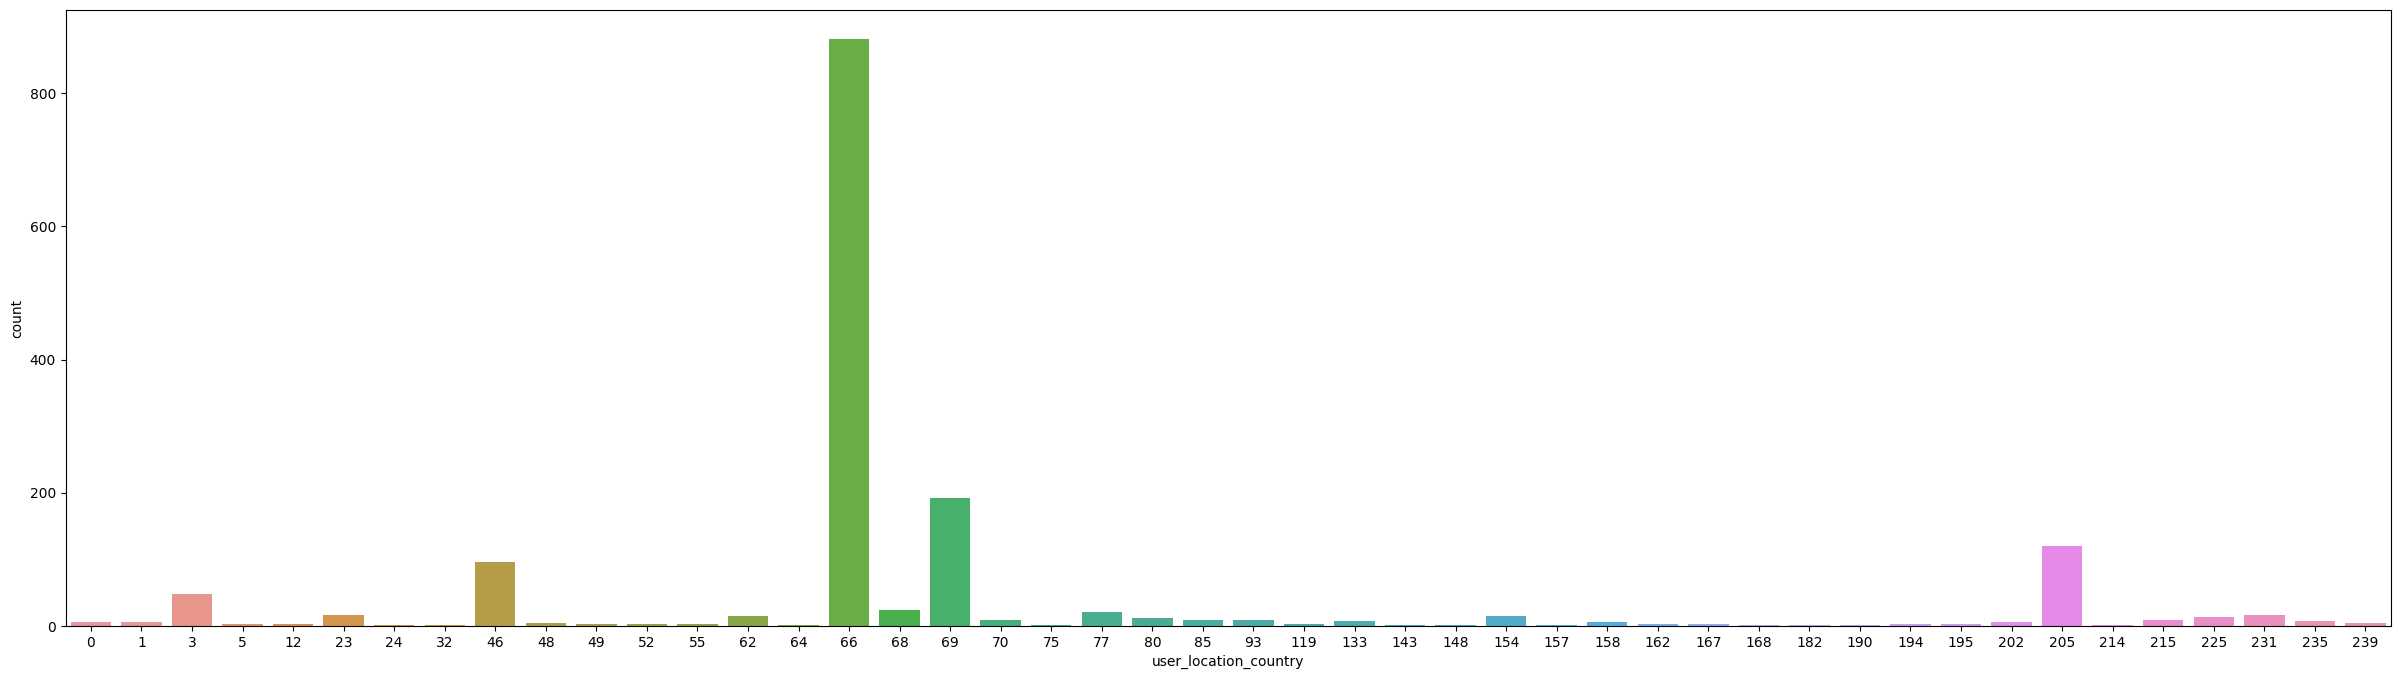

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
sns.countplot(x='user_location_country',data=bookings.sort_values(by=['user_location_country']))

**=> khách hàng đi du lịch từ quốc gia thứ 66 nhiều nhất,nên Expedia có thể giảm giá cho khách hàng thường xuyên nhằm thúc đẩy hoạt động kinh doanh và để xem lý do tại sao các quốc gia khác có lượng đặt phòng khách sạn thấp như vậy, có phải vì giá cả, số lượng khách sạn ít hơn, ít tiện nghi hơn trong một khách sạn.**

### 8. Những quốc gia có nhiều khách du lịch đến nhất

<Axes: xlabel='hotel_country', ylabel='count'>

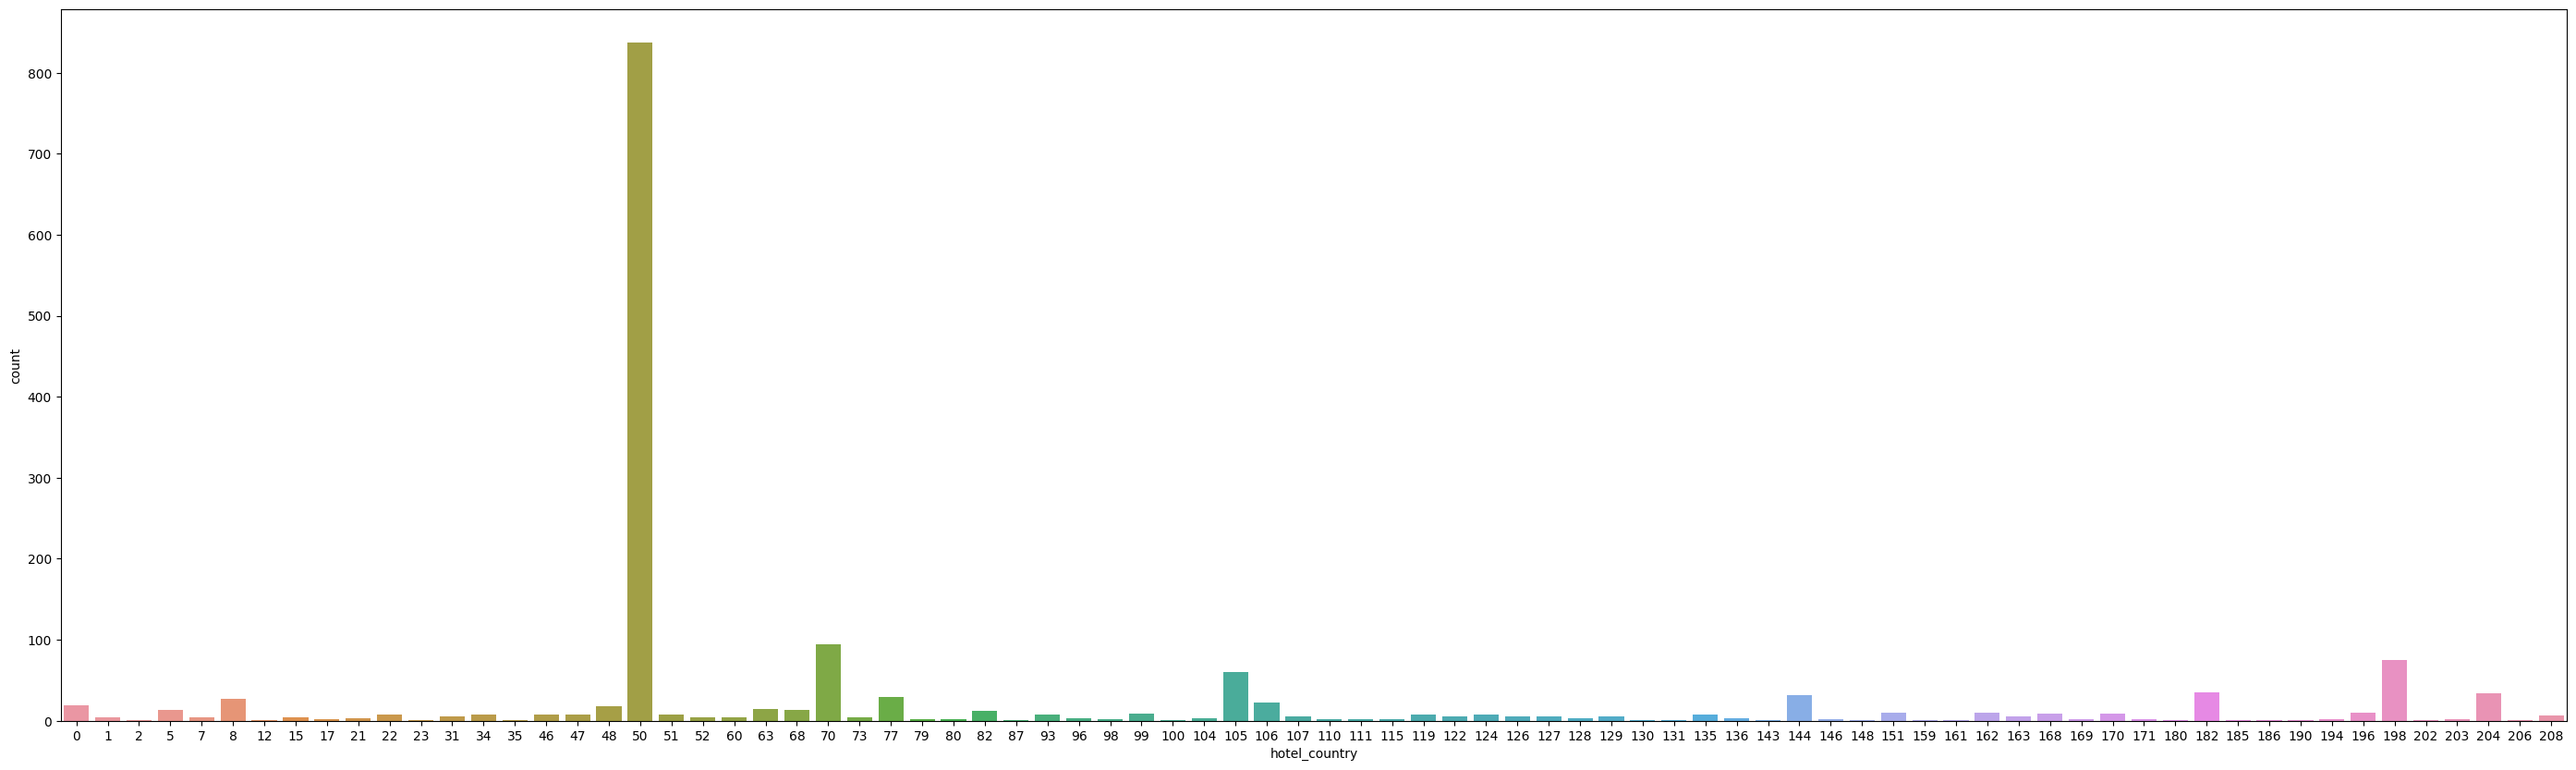

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(35,10)
sns.countplot(x='hotel_country',data=bookings.sort_values(by=['hotel_country']))

**=> Khách hàng đi du lịch đến quốc gia thứ 50 nhiều nhất,nên Expedia đưa ra nhiều đề xuất hơn về các khách sạn khác nhau với nhiều mức giá khác nhau, với các cơ sở khác nhau, với các vị trí khác nhau, tức là các khách sạn ở mọi vùng, mọi thành phố của quốc gia thứ 50.**

### 9. Số lượng người đặt phòng qua di động của các châu lục

<Axes: xlabel='posa_continent', ylabel='count'>

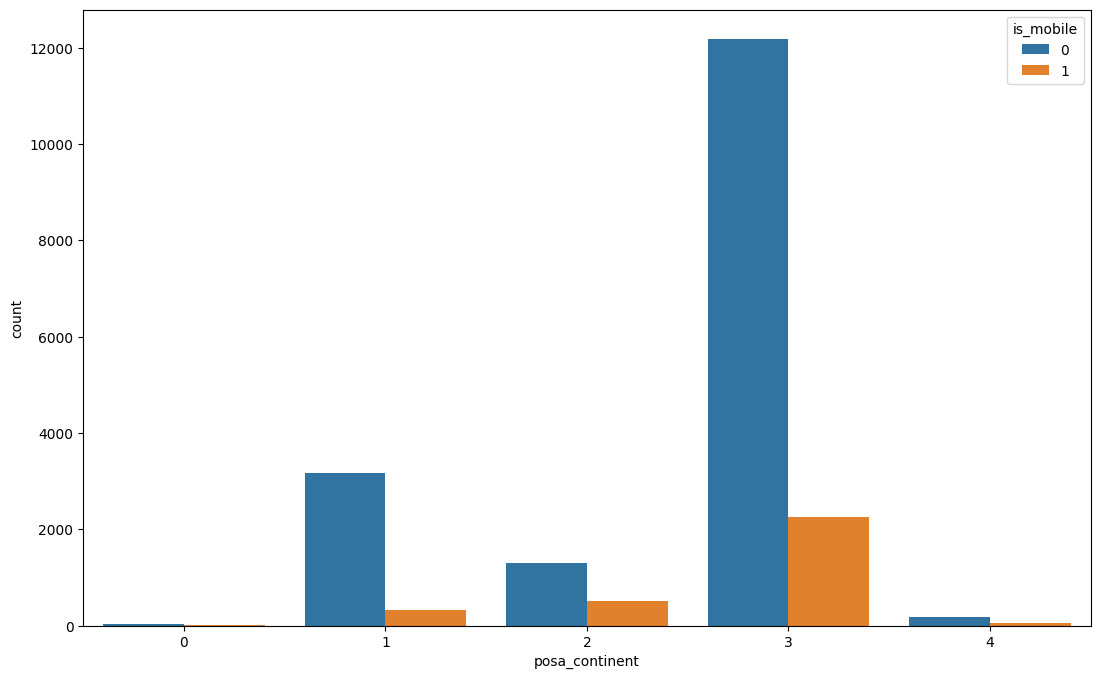

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

**=> Biểu đồ này có thể giúp cho Expedia thấy rằng nên cải thiện giao diện trang web trên máy tính để bàn và làm cho trang web tương tác hơn, thanh toán dễ dàng và trang web không gặp sự cố khi nhiều khách hàng cố gắng đặt vé thay vì trên giao diện di động**

### 10. Số lượng đặt phòng trên điện thoại di động theo quốc gia

<Axes: xlabel='user_location_country', ylabel='count'>

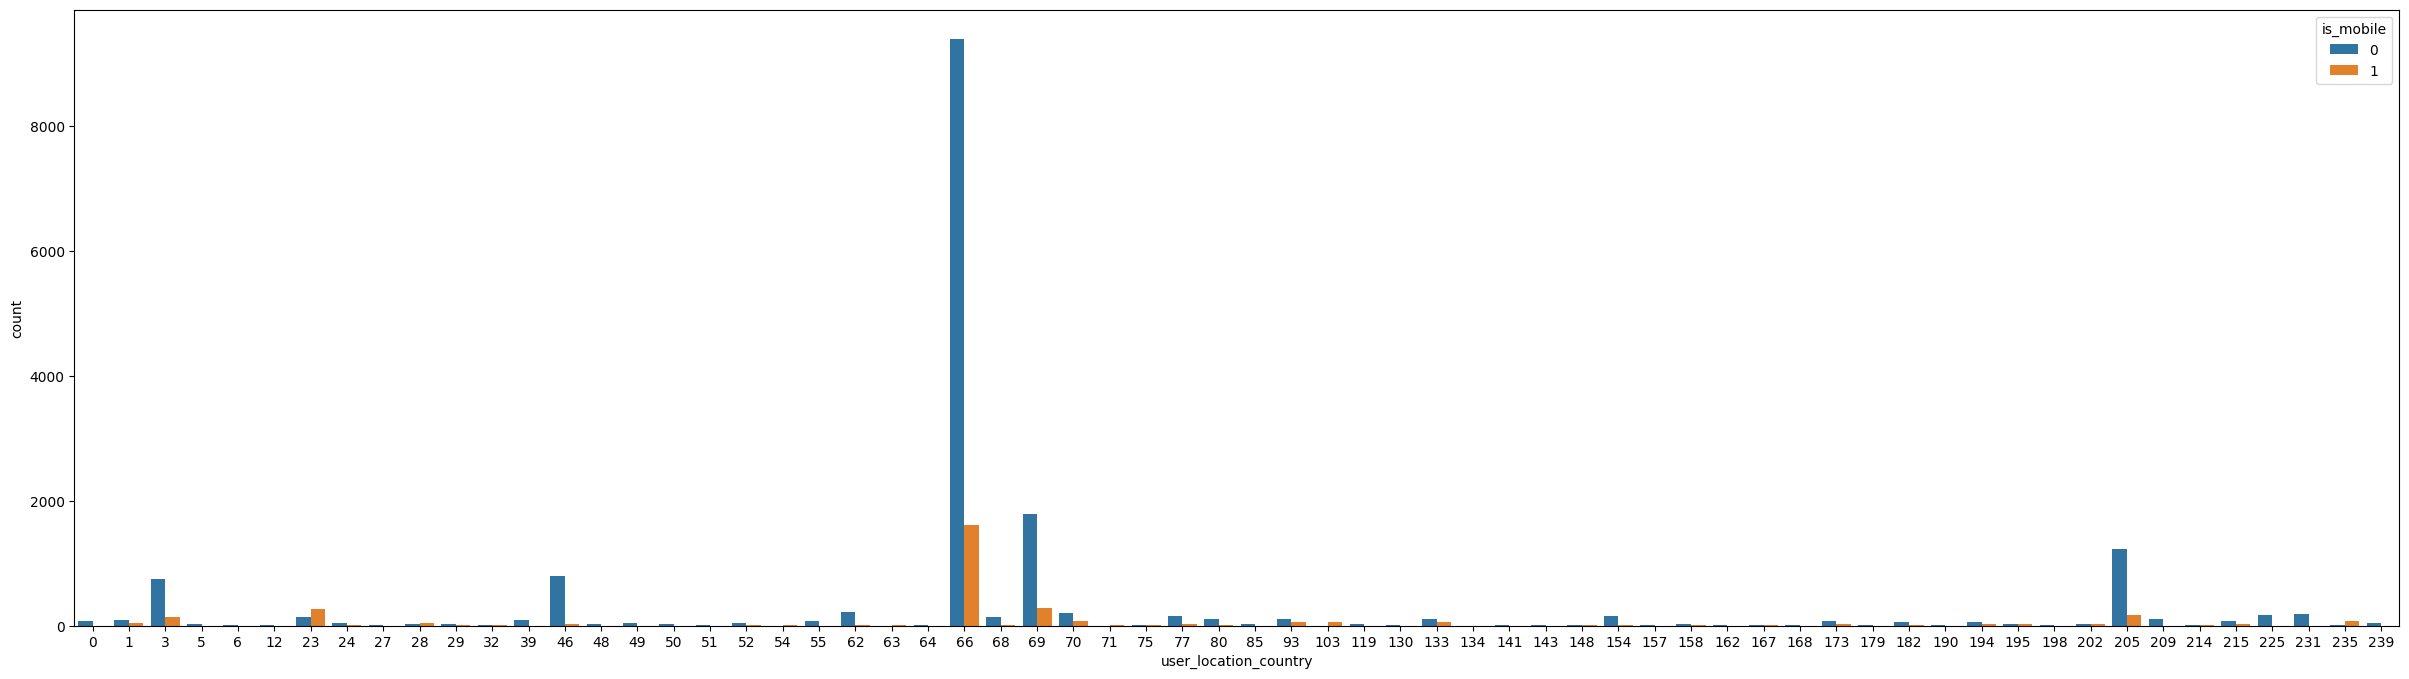

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x='user_location_country', hue='is_mobile', data = train)

### 11. Số lượng đặt phòng cho từng cụm khách sạn

<Axes: >

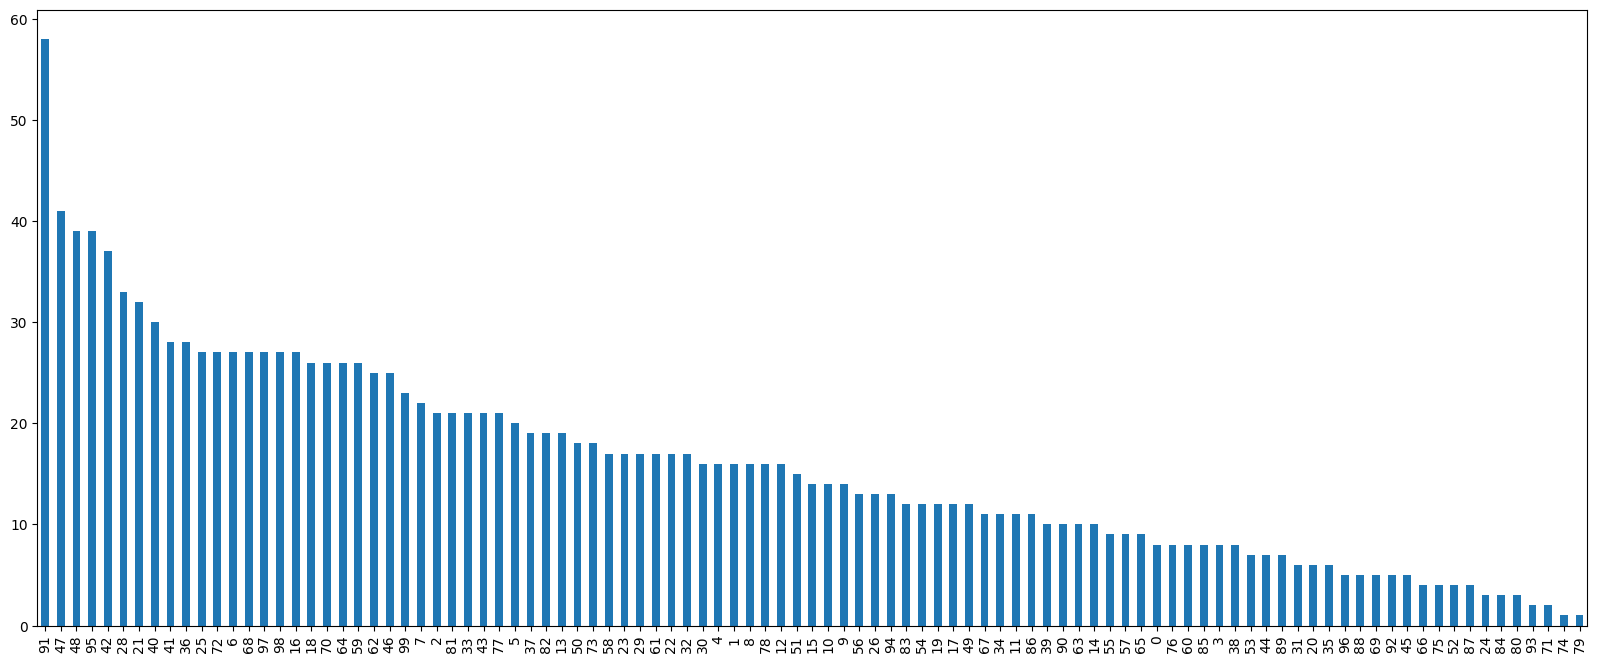

In [31]:
bookings['hotel_cluster'].value_counts().plot(kind='bar',figsize=(20,8))

**=> Biểu đồ giúp chúng ta dễ dàng nhận thấy cụm khách sạn 91 có lượt đặt phòng nhiều nhất**

### 12.Số lượng của các channel

<Axes: xlabel='channel', ylabel='count'>

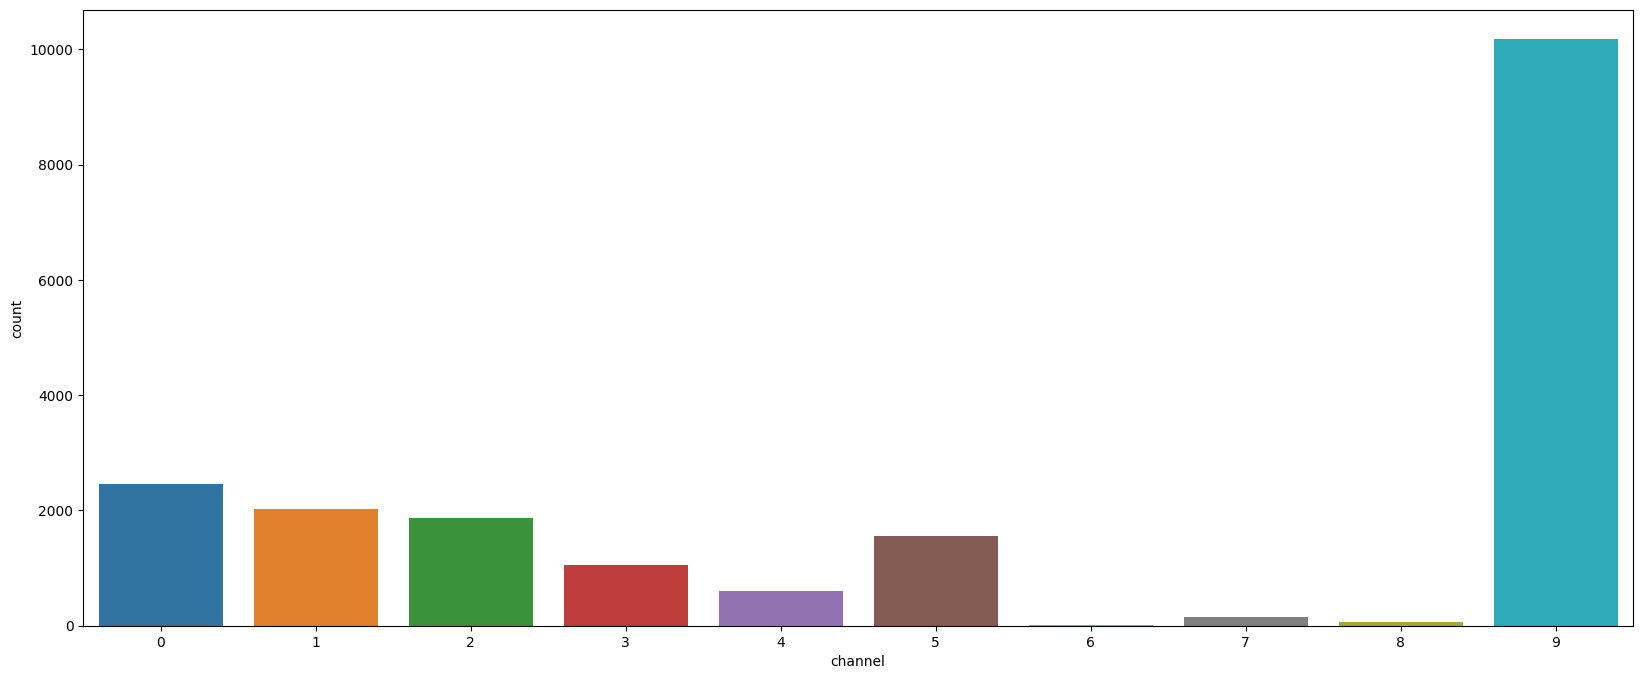

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='channel', order=list(range(0,10)), data=train)

**=>Chanel thứ 9 có ảnh hưởng lớn nhất**

## Feature Engineering

**Chúng ta có thể biết được thời gian lưu trú của khách hàng bằng cách lấy ngày nhận phòng trừ đi ngày trả phòng để giúp phân loại các khách sạn như "Chuyến đi dài ngày" khi khách hàng đặt khách sạn trong thời gian dài hay "Chuyến đi ngắn ngày" nơi khách hàng đặt phòng khách sạn của họ trong thời gian ngắn. Điều này có thể giúp giới thiệu những khách hàng khác khi những khách hàng đó chọn các tham số tìm kiếm giống nhau như "Chuyến đi dài" và "Chuyến đi ngắn".

Ngoài ra, nếu chúng ta tách ngày, tháng và năm, nó cũng có thể giúp tìm thấy hoạt động kinh doanh trong những năm qua, tức là khách hàng đặt phòng vào năm, tháng hoặc ngày nào nhiều nhất.**

In [33]:
def convert_date_into_days(df):
    #datetime features
    df['srch_ci']=pd.to_datetime(df['srch_ci'],infer_datetime_format = True,errors='coerce')
    df['srch_co']=pd.to_datetime(df['srch_co'],infer_datetime_format = True,errors='coerce')

    df['stay_duration'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['no_of_prior_days_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')

#     Month, Year, Day
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)
    return df

In [34]:
train = convert_date_into_days(train)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  20000 non-null  datetime64[ns]
 1   site_name                  20000 non-null  int64         
 2   posa_continent             20000 non-null  int64         
 3   user_location_country      20000 non-null  int64         
 4   user_location_region       20000 non-null  int64         
 5   user_location_city         20000 non-null  int64         
 6   orig_destination_distance  20000 non-null  float64       
 7   user_id                    20000 non-null  int64         
 8   is_mobile                  20000 non-null  int64         
 9   is_package                 20000 non-null  int64         
 10  channel                    20000 non-null  int64         
 11  srch_ci                    19988 non-null  datetime64[ns]
 12  srch

In [36]:
train.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_duration,no_of_prior_days_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0


### 13. Số lượng đặt phòng mỗi năm

<Axes: xlabel='Cin_year', ylabel='count'>

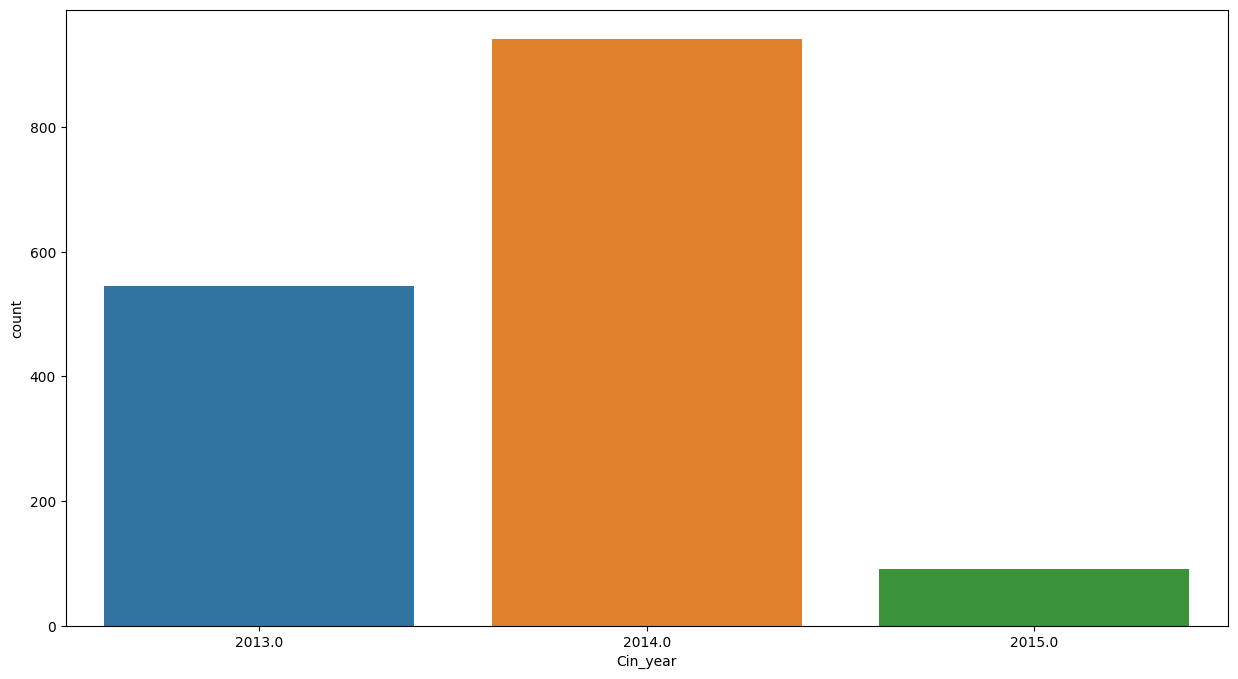

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x='Cin_year',data=train[train['is_booking']==1])

**=> Biểu đồ này giúp chúng ta hiểu được kinh doanh của Expedia tức là năm 2013 kinh doanh tốt, sau đó năm 2014 kinh doanh của Expedia đạt đỉnh thì năm 2015 kinh doanh của Expedia sa sút**

### 14. Số lượng đặt phòng mỗi tháng

<Axes: xlabel='Cin_month', ylabel='count'>

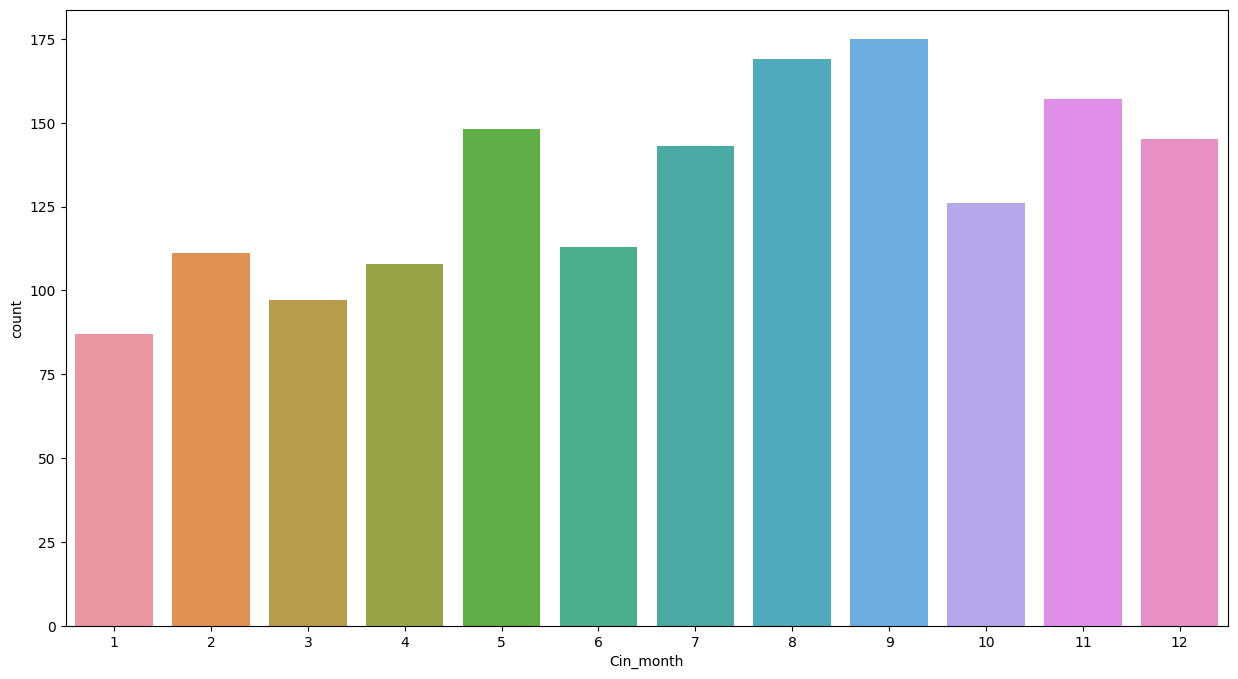

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x='Cin_month',data=train[train['is_booking']==1],order=list(range(1,13)))

**=> Biểu đồ này cho chúng ta biết về hành vi của khách hàng, đó là khi khách hàng có nhiều khả năng đặt phòng khách sạn hơn và muốn đi du lịch cùng gia đình.
Theo biểu đồ ta có thể suy ra tháng 8 là tháng khách hàng đặt phòng khách sạn nhiều nhất.**

### 15. Số lượng đặt phòng mỗi ngày

<Axes: xlabel='Cin_day', ylabel='count'>

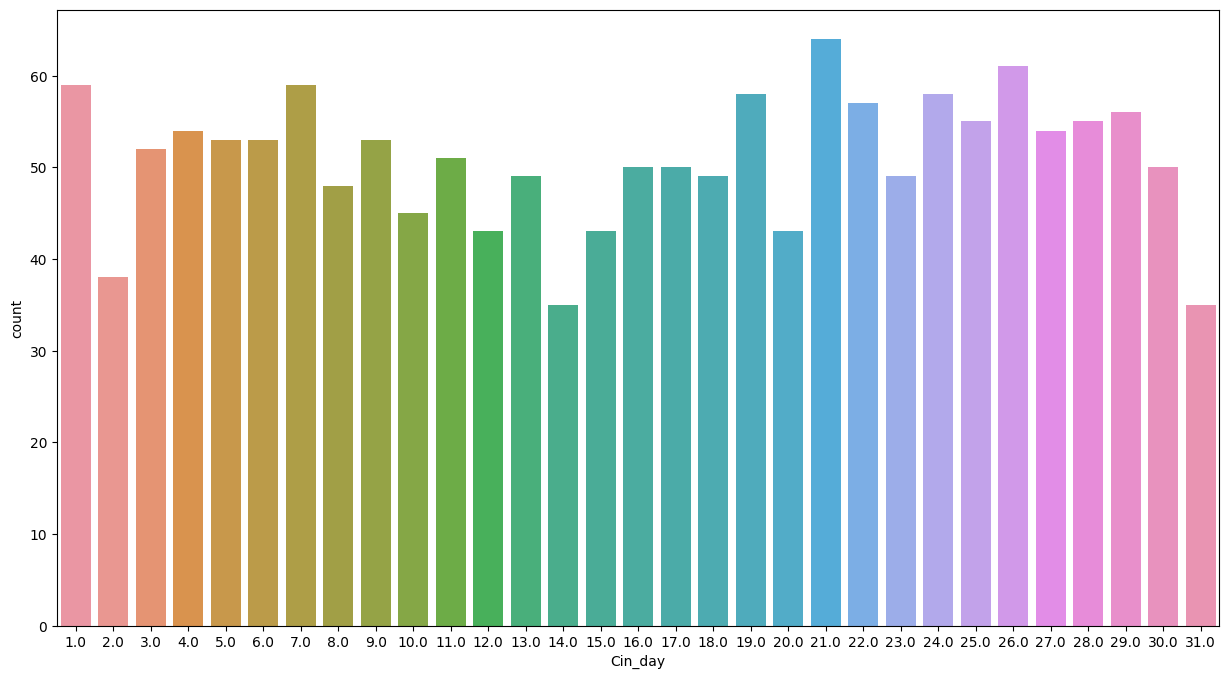

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x='Cin_day',data=train[train['is_booking']==1])

**=> Theo biểu đồ, chúng ta có thể suy luận rằng vào ngày đầu tiên của bất kỳ tháng nào, khách hàng có xu hướng đi du lịch và đặt phòng khách sạn nhiều hơn.
Vào ngày 1 hàng tháng, khách hàng nhận lương và tại thời điểm đó họ lên kế hoạch cho chuyến đi của mình**

### 16. Tổng số lượng đặt phòng qua các năm

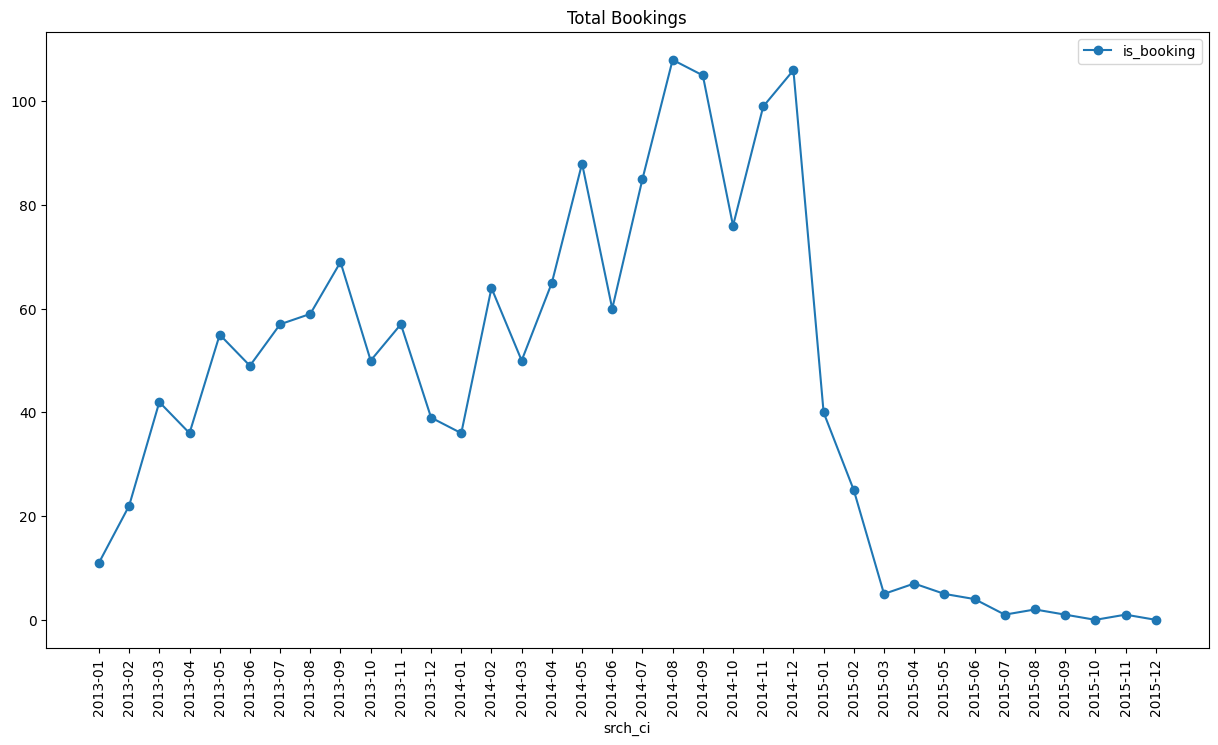

In [40]:
no_of_bookings=train['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)
date_bookings  = train.groupby(no_of_bookings)["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,8))
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

### 17. Thời gian lưu trú của khách hàng

<Axes: xlabel='stay_duration', ylabel='count'>

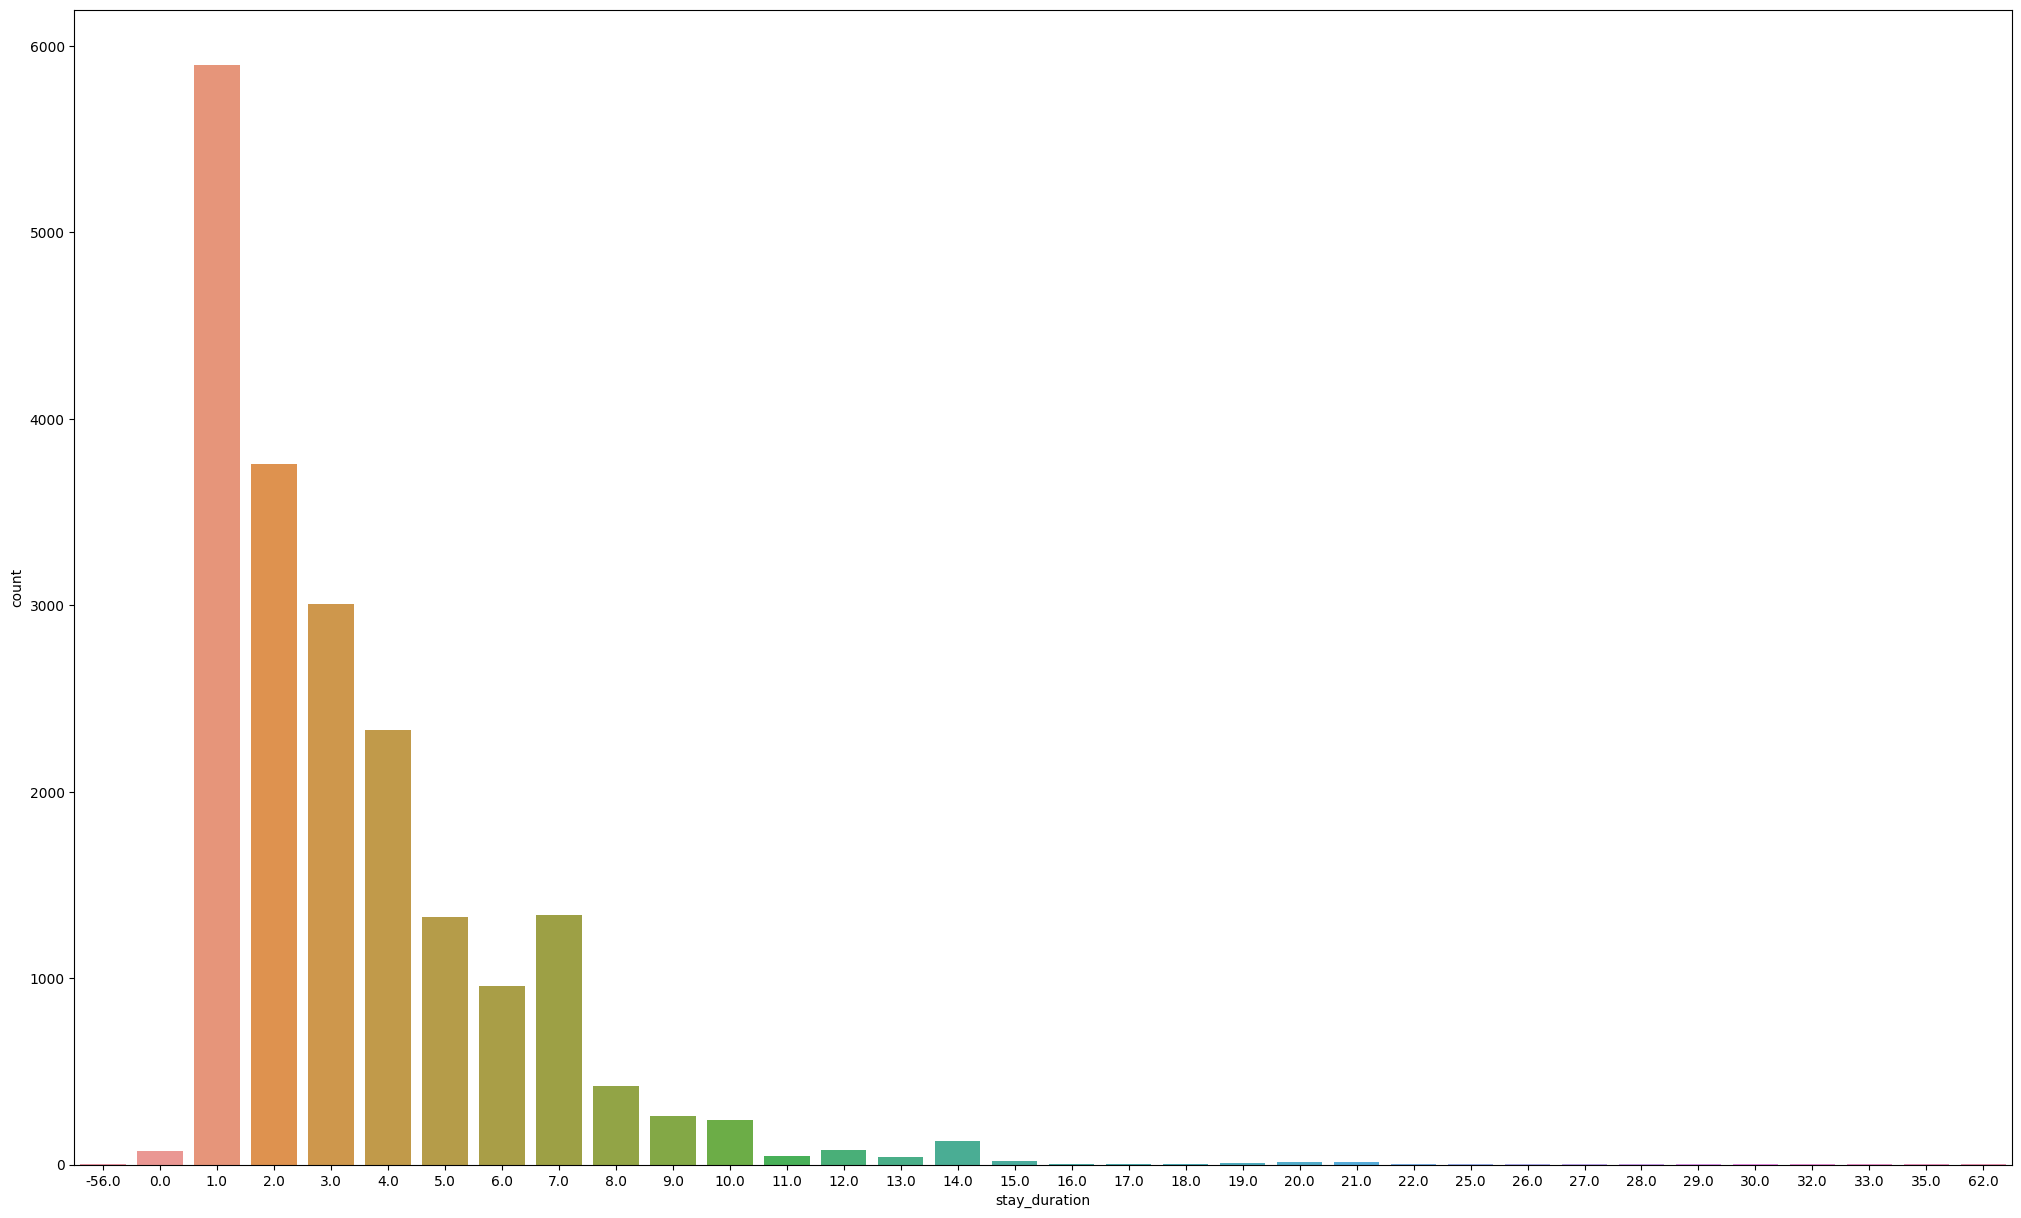

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.countplot(x="stay_duration", data=train)

In [42]:
#Thời gian lưu trú dài nhất
train['stay_duration'].max()

62.0

## Data Cleaning



In [43]:
train.corr()["hotel_cluster"]

<ipython-input-43-a7b1510e8b12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()["hotel_cluster"]


site_name                   -0.019915
posa_continent               0.001504
user_location_country       -0.030725
user_location_region         0.023837
user_location_city          -0.005704
orig_destination_distance    0.011639
user_id                      0.024026
is_mobile                    0.000335
is_package                   0.066475
channel                     -0.004570
srch_adults_cnt              0.013245
srch_children_cnt            0.013814
srch_rm_cnt                  0.001983
srch_destination_id          0.001321
srch_destination_type_id    -0.031501
is_booking                  -0.019084
cnt                          0.000314
hotel_continent              0.002559
hotel_country               -0.014655
hotel_market                 0.021885
hotel_cluster                1.000000
stay_duration                0.053685
no_of_prior_days_booking     0.055751
Cin_day                      0.001340
Cin_month                   -0.005296
Cin_year                     0.013351
Name: hotel_

**=> không có thuộc tính nào tương quan cao với thuộc tính hotel_cluster**

In [44]:
#Xóa các thuộc tính ngày tháng vì khi train model chưa cần thiết các thuộc tính này
columns = ['date_time', 'srch_ci', 'srch_co']
train.drop(columns=columns,axis=1,inplace=True)
test.drop(columns=columns,axis=1,inplace=True)

In [45]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19988 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site_name                  19988 non-null  int64  
 1   posa_continent             19988 non-null  int64  
 2   user_location_country      19988 non-null  int64  
 3   user_location_region       19988 non-null  int64  
 4   user_location_city         19988 non-null  int64  
 5   orig_destination_distance  19988 non-null  float64
 6   user_id                    19988 non-null  int64  
 7   is_mobile                  19988 non-null  int64  
 8   is_package                 19988 non-null  int64  
 9   channel                    19988 non-null  int64  
 10  srch_adults_cnt            19988 non-null  int64  
 11  srch_children_cnt          19988 non-null  int64  
 12  srch_rm_cnt                19988 non-null  int64  
 13  srch_destination_id        19988 non-null  int

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   site_name                  10000 non-null  int64  
 2   posa_continent             10000 non-null  int64  
 3   user_location_country      10000 non-null  int64  
 4   user_location_region       10000 non-null  int64  
 5   user_location_city         10000 non-null  int64  
 6   orig_destination_distance  10000 non-null  float64
 7   user_id                    10000 non-null  int64  
 8   is_mobile                  10000 non-null  int64  
 9   is_package                 10000 non-null  int64  
 10  channel                    10000 non-null  int64  
 11  srch_adults_cnt            10000 non-null  int64  
 12  srch_children_cnt          10000 non-null  int64  
 13  srch_rm_cnt                10000 non-null  int6

In [48]:
Y = train['hotel_cluster']
X = train.drop(['hotel_cluster'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19988 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site_name                  19988 non-null  int64  
 1   posa_continent             19988 non-null  int64  
 2   user_location_country      19988 non-null  int64  
 3   user_location_region       19988 non-null  int64  
 4   user_location_city         19988 non-null  int64  
 5   orig_destination_distance  19988 non-null  float64
 6   user_id                    19988 non-null  int64  
 7   is_mobile                  19988 non-null  int64  
 8   is_package                 19988 non-null  int64  
 9   channel                    19988 non-null  int64  
 10  srch_adults_cnt            19988 non-null  int64  
 11  srch_children_cnt          19988 non-null  int64  
 12  srch_rm_cnt                19988 non-null  int64  
 13  srch_destination_id        19988 non-null  int

## Chia 2 tập train test



In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print(len(X_train))
print(len(X_test))

16989
2999


## 1.Random Forest

---





In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {'n_estimators': [200,300, 400], 'max_depth': [7, 9, 11],}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],criterion = 'entropy')
rf.fit(X_train, Y_train)
rf_train_prediction = rf.predict(X_train)
rf_test_prediction = rf.predict(X_test)

train_accuracy = accuracy_score(Y_train,rf_train_prediction)
test_accuracy = accuracy_score(Y_test, rf_test_prediction)
rf_accuracy = test_accuracy

print('Best params:', best_params)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Best params: {'max_depth': 11, 'n_estimators': 200}
Train Accuracy: 65.80%
Test Accuracy: 33.38%


## 2.KNN


In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [7, 9, 11], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
knn.fit(X_train, Y_train)
knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

train_accuracy = accuracy_score(Y_train,knn_train_prediction)
test_accuracy = accuracy_score(Y_test, knn_test_prediction)
knn_accuracy = test_accuracy

print('Best params:', best_params)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Best params: {'n_neighbors': 11, 'weights': 'distance'}
Train Accuracy: 89.36%
Test Accuracy: 30.91%


## 3.Decision Tree



In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
param_grid = {'max_depth': [7, 9, 11], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 3]}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
dt.fit(X_train, Y_train)
dt_train_prediction = dt.predict(X_train)
dt_test_prediction = dt.predict(X_test)

train_accuracy = accuracy_score(Y_train,dt_train_prediction)
test_accuracy = accuracy_score(Y_test, dt_test_prediction)
dt_accuracy = test_accuracy

print('Best params:', best_params)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Best params: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 26.09%
Test Accuracy: 18.27%


## So sánh các mô hình

In [57]:
accuracy=[rf_accuracy*100,knn_accuracy*100,dt_accuracy*100]
accuracy

[33.37779259753251, 30.91030343447816, 18.272757585861953]

In [58]:
algorithms=["Random Forest","KNN","Decsion trees"]

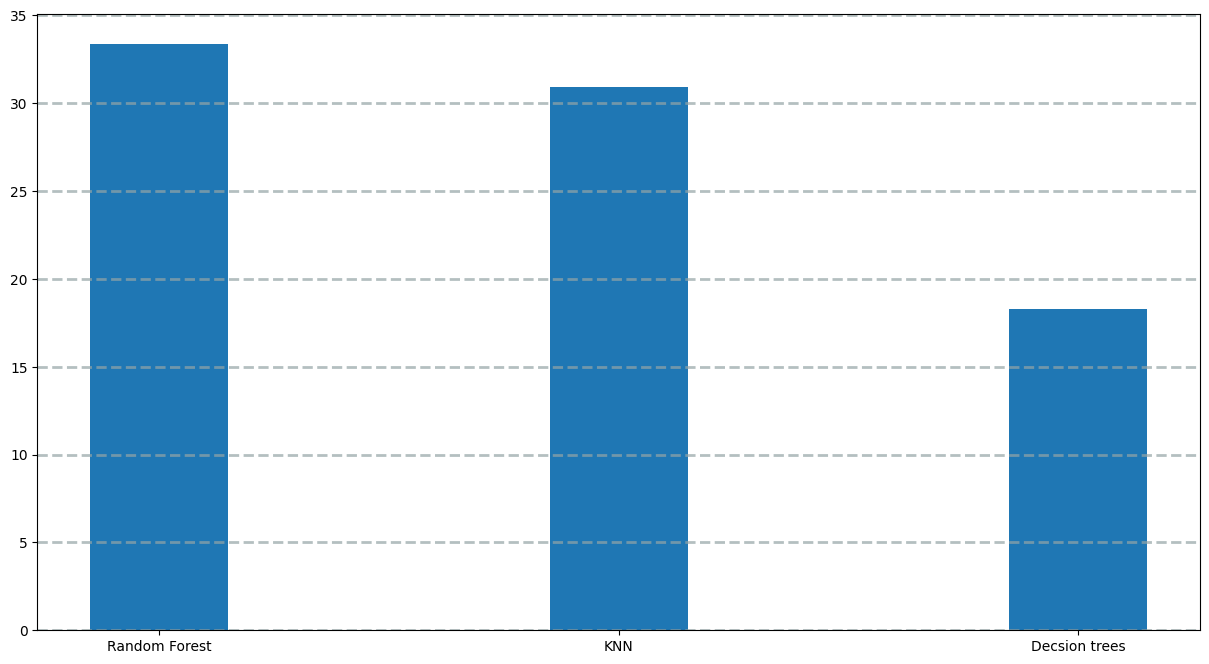

In [59]:
plt.figure(figsize=(15,8))
plt.bar(algorithms,accuracy,width=0.3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

#Kết luận

Qua phần trực quan hóa dữ liệu chúng ta có thể phần nào tìm ra được thị hiếu của khách hàng trong nhu cầu đặt phòng khách san. Từ đó công ty có thể đưa ra các chiến lược hợp lý để đưa công ty phát triển.Đây là một bài toán rất thực tế tuy nhiên độ chính xác của các mô hình do em xây dựng chưa cao có thể một phần do em chưa train hết bộ dữ liệu(Do em sử dụng google colab nên không thể đọc hết bộ dữ liệu được) và cũng do chất lượng của bộ dữ liệu bị missing value khá nhiều,các biến không có tương quan với nhau.Nếu có thời gian em sẽ tìm hiểu những mô hình khác để làm tăng thêm độ chính xác của bài toán